<a href="https://colab.research.google.com/github/stefkong1982/netology.ru/blob/Master/Analitika_bolshih_dannyh/Kejsy_i_oblasti_bolshih_dannyh/DZ_Kondratev_Kejsy_i_oblasti_bolshih_dannyh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Самостоятельное домашнее задание к занятию «Кейсы и области применения больших данных»

**Преподаватель:** Алексей Кузьмин

**Цель задания**

Научиться решать практические задачи с использованием pandas или pyspark на основе реальных данных и провести работу с данными от загрузки данных до построения модели.

**Важно**

Это задание не будет проверено экспертом, однако, стоит его выполнить, чтобы отработать теорию и с лёгкостью справляться с подобными задачами на практике.

**Контекст**

Дан набор данных по оттоку клиентов. Набор данных содержит всего 5 000 записей (то есть абонентов).

Данные доступны [тут](https://drive.google.com/open?id=1ArslqEEno2hrr5tAs25P0JN0P-coLcFD)

Перечень полей:

* state – штат
* account length – абонентский стаж
* area code – код региона
* phone number – номер телефона
* international plan – тарифный план для международных звонков
* voice mail plan – тарифный план для голосовой почты
* number vmail messages – количество сообщений голосовой почты
* total day minutes – общая длительность звонков в дневное время (мин)
* total day calls – общее количество звонков в дневное время
* total day charge – общая стоимость звонков в дневное время
* total eve minutes – общая длительность звонков в вечернее время (мин)
* total eve calls – общее количество звонков в вечернее время
* total eve charge – общая стоимость звонков в вечернее время
* total night minutes – общая длительность звонков в ночное время (мин)
* total night calls – общее количество звонков в ночное время
* total night charge – общая стоимость звонков в ночное время
* total intl minutes – общая длительность международных звонков (мин)
* total intl calls – общее количество международных звонков
* total intl charge – общая стоимость международных звонков
* number customer service calls – количество звонков в службу поддержки
* churned – покинул ли клиент компанию

**Описание задания**

Ваша задача - используя `panda`s или `pyspark`, ответить на следующие вопросы:



1. Построить гистограмму количества звонков в техническую поддержку
2. Рассчитать и построить гистограмму общей длительности звонков клиента (дневных + ночных + вечерних + международных)
3. Собственноручно (не используя встроенных функций) рассчитать линейный коэффициент корреляции (доп. материалы общего количества минут и количества звонков в техподдержку
4. Визуализировать точечный график по общему количеству минут / количеству звонков в поддержку, подкрасив точки в зависимости от оттока абонента
5. Вывести top-5 самых много и самых мало говорящих клиентов
6. Вывести долю оттока клиентов и среднюю стоимость минуты дневного времени разговора в зависимости от штата
7. Перевести штат в one-hot формат при помощи pandas-функции get_dummies или удалить колонку, если вы делаете решение на pyspark
8. Разбить данные на множества для обучения и для проверки, отобрав признаки для обучения модели классификации (убрать номер телефона, код региона, признаки планов + все добавленные атрибуты)
9. Обучить какую-нибудь модель классификации и оценить качество (точность) на отложенной выборке

**Формат выполнения**

Выполните задание в Google Colaboratory (Python) с помощью pandas или pyspark.

**Результат выполненного задания**

* Для корректной сдачи домашнего задания необходимо в личном кабинете прикреплять ссылку на ваше решение в Google Colab.
* После того, как вы прикрепите ссылку на своё решение в личном кабинете, вам станет доступно эталонное решение, которое подготовил эксперт. Проверьте правильность выполнения этого задания самостоятельно, сравнив свой документ с эталоном.
* Если в процессе выполнения самостоятельного домашнего задания у вас возникнут вопросы, их можно будет обсудить с экспертом на разборном вебинаре.

Установка Spark

In [ ]:
# Обновляем пакеты системы с помощью apt-get update
!apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,735 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,339 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/

In [ ]:
# Устанавливаем OpenJDK 8 с помощью apt-get install.
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
# Скачиваем архив Spark с официального сайта с помощью wget.
!wget -q https://downloads.apache.org/spark/spark-3.5.0/spark-3.5.0-bin-hadoop3.tgz

In [ ]:
# Распаковываем архив Spark с помощью tar -xvf.
!tar -xvf spark-3.5.0-bin-hadoop3.tgz

In [ ]:
# Устанавливаем findspark с помощью pip install.
!pip install -q findspark

In [ ]:
# Устанавливаем переменные окружения JAVA_HOME и SPARK_HOME для работы с Spark.
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.0-bin-hadoop3"

In [ ]:
# Инициализируем findspark для работы с Spark.
import findspark
findspark.init()

# Создаем экземпляр SparkSession для работы с Spark.
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

# Получаем контекст SparkContext для работы с Spark.
sc = spark.sparkContext

### Загрузка данных

In [6]:
# Загрузка данных

import pandas as pd

# Загрузите данные
data = pd.read_csv('https://raw.githubusercontent.com/stefkong1982/netology.ru/Master/Analitika_bolshih_dannyh/Kejsy_i_oblasti_bolshih_dannyh/churn.csv')

In [8]:
# Отображаем датафрейм.
data

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,50,408,365-8751,no,yes,40,235.7,127,40.07,...,126,18.96,297.5,116,13.39,9.9,5,2.67,2,False
4996,WV,152,415,334-9736,no,no,0,184.2,90,31.31,...,73,21.83,213.6,113,9.61,14.7,2,3.97,3,True
4997,DC,61,415,333-6861,no,no,0,140.6,89,23.90,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,False
4998,DC,109,510,394-2206,no,no,0,188.8,67,32.10,...,92,14.59,224.4,89,10.10,8.5,6,2.30,0,False


In [10]:
# Обзор данных
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   object 
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   object 
 4   international_plan             5000 non-null   object 
 5   voice_mail_plan                5000 non-null   object 
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   f

In [12]:
data.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,436.911400,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,39.69456,42.209182,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,408.000000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.00000,415.000000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,415.000000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.00000,510.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


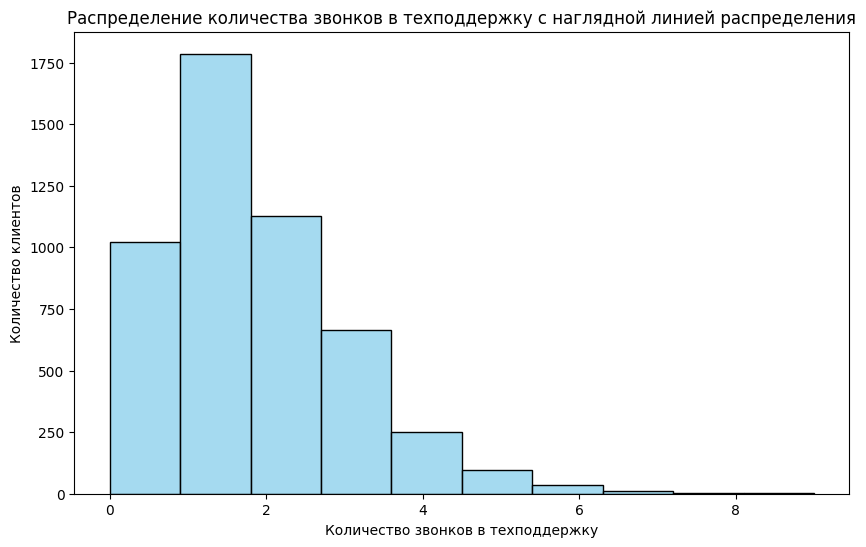

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Построение гистограммы и линии распределения количества звонков
plt.figure(figsize=(10, 6))
sns.histplot(data['number_customer_service_calls'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel("Количество звонков в техподдержку")
plt.ylabel("Количество клиентов")
plt.title("Распределение количества звонков в техподдержку с наглядной линией распределения")
plt.show()


In [28]:
# Рассчет общей длительности звонков
data['total_duration'] = data['total_day_minutes'] + data['total_eve_minutes'] + data['total_night_minutes'] + data['total_intl_minutes']

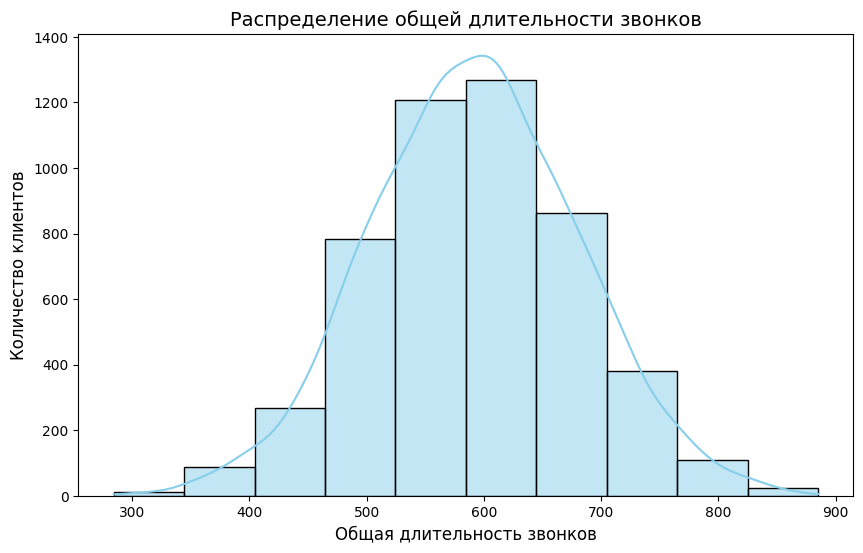

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Построение гистограммы и линии распределения общей длительности звонков
plt.figure(figsize=(10, 6))
sns.histplot(data['total_duration'], bins=10, kde=True, color='skyblue', edgecolor='black')
plt.xlabel("Общая длительность звонков", fontsize=12)
plt.ylabel("Количество клиентов", fontsize=12)
plt.title("Распределение общей длительности звонков", fontsize=14)
plt.show()


### При помощи VectorAssembler преобразовать все колонки с признаками в одну (использовать Pipeline — опционально).


In [ ]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

# В данном коде мы импортируем модули Vectors и VectorAssembler из PySpark.
# Модуль Vectors содержит классы и функции для работы с векторами признаков,
# а модуль VectorAssembler используется для сборки признаков в вектор.

In [ ]:
# Метод df.columns возвращает список столбцов датафрейма df.

df.columns

In [ ]:
# Преобразование признаков:
# Функция VectorAssembler используется для преобразования признаков
# 'sepal_length', 'sepal_width', 'petal_length', 'petal_width' в вектор признаков 'Features'.

assembler = VectorAssembler(inputCols=[
 'sepal_length',
 'sepal_width',
 'petal_length',
 'petal_width',
 ], outputCol='Features')

In [ ]:
df = assembler.transform(df)

# В данном коде мы применяем функцию VectorAssembler к датафрейму df с помощью метода transform().
# Метод transform() применяет функцию к каждому ряду датафрейма и возвращает новый датафрейм с преобразованными данными.
# В результате применения VectorAssembler к df, мы получаем новый датафрейм, в котором все признаки
# 'sepal_length', 'sepal_width', 'petal_length', 'petal_width' объединены в один столбец 'Features'.

In [ ]:
df.show(5)

### Разобьем данные на данные для обучения и проверки

In [ ]:
train, test = df.randomSplit([0.8, 0.2], seed=12345)

# Разбиение данных на обучающую и тестовую выборки:
# Метод randomSplit() используется для случайного разделения датафрейма
# на обучающую и тестовую выборки с заданными пропорциями.

#В данном случае, 80% данных используется для обучения, а 20% - для тестирования.

# Параметр seed=12345 в методе randomSplit()
# используется для задания начального значения генератора случайных чисел.

# Это позволяет получить воспроизводимые результаты разделения данных на обучающую и тестовую выборки.
# Если вы используете один и тот же код и зададите тот же seed, то получите одни и те же случайные числа,
# и, следовательно, одни и те же обучающую и тестовую выборки

In [ ]:
train.show(5)

### Создадим и обучим модель логистической регрессии

In [ ]:
from pyspark.ml.classification import LogisticRegression

# В данном коде мы импортируем класс LogisticRegression из модуля pyspark.ml.classification.
# Класс LogisticRegression используется для обучения модели логистической регрессии.

In [ ]:
lr = LogisticRegression(featuresCol = 'Features', labelCol = 'variety_num')
lrModel = lr.fit(train)

# Обучение модели логистической регрессии:
# Создается экземпляр класса LogisticRegression
# с указанием столбца признаков 'Features' и столбца меток 'variety_num'.

# Затем модель обучается на обучающей выборке с помощью метода fit().

In [ ]:
train_res = lrModel.transform(train)
test_res = lrModel.transform(test)

# В данном коде мы применяем обученную модель логистической регрессии lrModel
# к обучающей выборке train и тестовой выборке test с помощью метода transform().

# Метод transform() применяет модель к данным и возвращает новый датафрейм с предсказаниями модели.
# В результате, мы получаем датафреймы train_res и test_res, которые содержат исходные данные и предсказания модели для каждой строки.

In [ ]:
df_pandas = train_res.toPandas()
df_pandas.head(1)

# Данный код преобразует датафрейм train_res из PySpark в pandas.DataFrame с помощью метода toPandas().
# Затем он выводит на экран первую строку преобразованного датафрейма с помощью метода head(1).
# Этот код позволяет просмотреть первые несколько строк датафрейма train_res как полноценный датафрейм в pandas.

1. Значения `rawPrediction` представляют собой скалярное произведение вектора признаков и вектора коэффициентов модели.

* `67.70279195875312` - это предсказание модели для класса `Setosa`.

* `-5.483728693221446` - это предсказание модели для класса `Versicolor`.

* `-62.21906326553166` - это предсказание модели для класса `Virginica`.

Чем больше это значение, тем больше вероятность того, что наблюдение принадлежит к соответствующему классу.


2. Pначения `probability` представляют собой вероятности принадлежности каждого наблюдения к каждому из классов.

* `1.0` - это вероятность принадлежности наблюдения к классу `Setosa`.

* `1.642471835404166e-32` - это вероятность принадлежности наблюдения к классу `Versicolor`.


* `3.764048385223648e-57` - это вероятность принадлежности наблюдения к классу `Virginica`.

Это значение может быть интерпретировано как степень уверенности модели в принадлежности данного наблюдения к классу. Чем ближе значение к 1, тем больше вероятность того, что наблюдение принадлежит к соответствующему классу.

3. `prediction` - это предсказанный класс для каждого наблюдения. В данном случае, наблюдение было предсказано как класс `Setosa`.



### Оценим качество

Для оценки качества предсказания в spark реализованно несколько классов

Если мы решаем задачу бинарной классификации (то есть классов - 2),

то нам подойдет `BinaryCLassificationEvaluator`,

а если классов больше 2-х, то `MulticlassClassificationEvaluator`

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Библиотека pyspark.ml.evaluation содержит классы и функции
# для оценки качества моделей машинного обучения в PySpark.

# В данном случае, мы используем класс MulticlassClassificationEvaluator
# для оценки качества модели логистической регрессии на основе метрики точности.

In [ ]:
ev = MulticlassClassificationEvaluator(labelCol='variety_num')

# Оценка качества модели: Для оценки качества модели используется MulticlassClassificationEvaluator.
# Создается экземпляр класса MulticlassClassificationEvaluator с указанием столбца меток 'variety_num'.

In [ ]:
# Метод evaluate() применяется к результатам обучения и тестирования модели. Значение точности выводится на экран.

ev.evaluate(train_res)
print("Точность модели на обучающей выборке: %.2f" % ev.evaluate(train_res))

ev.evaluate(test_res)
print("Точность модели на тестовой выборке: %.2f" % ev.evaluate(test_res))

### Обучите модель дерева решений и оцените его качество





In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier

In [ ]:
tr = DecisionTreeClassifier(featuresCol='Features', labelCol='variety_num')
trFitted = tr.fit(train)

# Обучение модели дерева решений:
# Аналогично предыдущему шагу, создается экземпляр класса DecisionTreeClassifier
# с указанием столбца признаков 'Features' и столбца меток 'variety_num'.
# Затем модель обучается на обучающей выборке с помощью метода fit().

In [ ]:
train_tr_res=trFitted.transform(train)
test_tr_res=trFitted.transform(test)

# В данном коде мы применяем обученную модель логистической регрессии lrModel
# к обучающей выборке train и тестовой выборке test с помощью метода transform().

In [ ]:
train_tr_res.show(5)

In [ ]:
# Метод evaluate() применяется к результатам обучения и тестирования модели. Значение точности выводится на экран.

ev.evaluate(train_tr_res)
print("Точность модели дерева решений на обучающей выборке: %.2f" % ev.evaluate(train_tr_res))

ev.evaluate(test_tr_res)
print("Точность модели дерева решений на тестовой выборке: %.2f" % ev.evaluate(test_tr_res))

По результатам оценки моделей логистической регрессии и дерева решений с использованием библиотеки PySpark можно сделать следующие выводы:

1. Модель логистической регрессии показала высокую точность на обучающей выборке (98%) и отличную точность на тестовой выборке (100%). Это говорит о том, что модель хорошо обобщает данные и способна делать точные прогнозы как на известных, так и на новых данных.

2. Модель дерева решений также продемонстрировала высокую точность на обучающей выборке (99%) и отличную точность на тестовой выборке (100%). Это указывает на то, что модель дерева решений эффективно обучается на данных и хорошо обобщает информацию для делания точных прогнозов.

Обе модели показали высокие показатели точности как на обучающей, так и на тестовой выборках, что свидетельствует о их хорошей способности к классификации. Однако, у модели логистической регрессии наблюдается небольшое снижение точности на тестовой выборке по сравнению с обучающей, в то время как у модели дерева решений точность остается на одном уровне. Таким образом, обе модели могут быть использованы для классификации данных, но стоит учитывать особенности каждой из них при принятии окончательного решения.